<a href="https://colab.research.google.com/github/JuliaKoryukova/Neural-Networks/blob/main/07_TF_IDF_Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='green' size='7'>**Обработка естественного языка. Упрощенное представление текста. TF-IDF, Word2Vec**</font>  
<font color='#11a642' size='6'>**Преобразование текста в векторную модель и работа с ним**</font>   




**Описание плана работы**

1. Загрузка файла с 10 песнями, файл с песнями после препроцессинга
2. Расчет метрик TF-IDF для загруженных данных. Проверка какие слова повторяются чаще всего.
3. Построение графика наиболее частых слов с помощью WordCloud.
4. Подготовка данных для обучения в модели Word2Vec библиотеки gensim.
5. Обучение модели Word2Vec на данных.
6. Проверка близких слов к одному из слов в датасете.
7. Построение графика t-SNE для 15 наиболее часто встречающихся слов.




# <font color='#11a642' size='6'> Импорт и установка библиотек

In [ ]:
# установка дополнительной библиотеки
!pip install pymorphy3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 45.3 MB/s eta 0:00:00


In [ ]:
# установка дополнительной библиотеки
!pip install wordcloud

In [ ]:
import os # библиотеки работы с папками и системой

# и другие уже известные нам библиотеки
import pandas as pd
import numpy as np

import re # регулярные выражения: предобработка текстов, строить признаки-шаблоны на слова и подстроки текста и многое другое
import string # работа со строками (в тч пунктуация)

from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.manifold import TSNE
from gensim.models import Word2Vec

import pymorphy3 # Для русского языка

import wordcloud # отображение на графике мешка слов

from wordcloud import WordCloud

import matplotlib
import matplotlib.pyplot as plt # визуализация данных

from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer # модель мешок слов
from sklearn.feature_extraction.text import TfidfVectorizer # модель TF IDF

import nltk

In [ ]:
morph = pymorphy3.MorphAnalyzer() # Создать экземпляр Морфологического анализатора для русского языка

In [ ]:
plt.rcParams["figure.figsize"] = (10,5) # размер графиков

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# <font color='#11a642' size='6'> Загрузка данных
Загрузка файла с 10 песнями, файл с песнями после препроцессинга



In [1]:
!gdown 1-5K77Jr4KvlTt_HGuhkhCqQiZTyZ2aJ6

Downloading...
From: https://drive.google.com/uc?id=1-5K77Jr4KvlTt_HGuhkhCqQiZTyZ2aJ6
To: /content/song_data_cleaned.txt
100% 14.2k/14.2k [00:00<00:00, 25.0MB/s]


In [2]:
song_data = "/content/song_data_cleaned.txt"
with open("song_data_cleaned.txt", encoding='utf-8') as song_file:
  song_data=song_file.read()

In [ ]:
song_data.replace("\n"," ")

'ддт осень осень это небо плачущий небо нога лужа разлетаться птица облако осень давно лужа разлетаться птица облако осень давно осень небо жечь корабль осень прочь земля море тонуть печаль осень тёмный даль осень это камень верность чернеть нева осень вновь напомнить душа главный осень лишить покой осень вновь напомнить душа главный осень лишить покой осень небо жечь корабль осень прочь земля море тонуть печаль осень тёмный даль осень это ветер вновь играть рваный цепь осень доползти долететь ответ родина осень доползти долететь рассвет завтра осень небо жечь корабль осень прочь земля море тонуть печаль осень тёмный даль осень небо жечь корабль осень прочь земля море тонуть печаль осень тёмный даль таять стая город мгла осень знать сколько рваться листва осень вечно право король шут кукла колдун тёмный мрачный коридор цыпочки вор пробираться дышать спугнуть спать давно всё равно чей комната тайком желать заглянуть увидеть бессонница час ночной менять нелюдимый облик твой чей невольниц

# <font color='#11a642' size='6'> Векторное представление

## <font color='#11a642' size='5'> Метрика TF-IDF
Расчет метрики TF-IDF для загруженных данных.



In [ ]:
# Оборачиваю текст в список
document = [song_data]

# Создаю объект TF-IDF
vectorizer = TfidfVectorizer()

# Применяю к документу (преобразование текста в матрицу TF-IDF)
tfidf_matrix = vectorizer.fit_transform(document)

# Получаю список слов
feature_names = vectorizer.get_feature_names_out()
feature_names

array(['credo', 'hа', 'hагибаяться', 'hарyшать', 'international', 'mr',
       'tолько', 'yпасть', 'автомат', 'алла', 'анна', 'ас', 'асфальт',
       'бег', 'бежать', 'безликий', 'белyть', 'белые', 'белый', 'берёза',
       'бесконечность', 'беспечный', 'беспокоить', 'бессонница',
       'бессонный', 'бить', 'божий', 'болеть', 'больно', 'большой',
       'босоногий', 'бояться', 'бывать', 'быстро', 'важный', 'ваня',
       'вдали', 'вдвоём', 'верещать', 'верить', 'верность', 'весь',
       'ветер', 'ветка', 'вечер', 'вечно', 'взамен', 'взгляд',
       'взорваться', 'видать', 'видеть', 'вижy', 'висеть', 'вкус',
       'влюбляться', 'вновь', 'вода', 'возврат', 'возвращаться', 'воздух',
       'волосок', 'вор', 'восток', 'впереди', 'врать', 'время',
       'встретить', 'встреча', 'встречать', 'всё', 'выбрать', 'выжечь',
       'выпрямить', 'высота', 'выстрелить', 'вьетнамец', 'гдето',
       'герман', 'гермошлем', 'главный', 'глаз', 'говорить', 'год',
       'голова', 'голубеющyть', 'голуб

In [ ]:
# Перевожу в плотную матрицу
dense_matrix = tfidf_matrix.todense()

# Перевожу в табличный вид
df_tfidf = pd.DataFrame(dense_matrix, columns=feature_names)
df_tfidf.head()

,credo,hа,hагибаяться,hарyшать,international,mr,tолько,yпасть,автомат,алла,...,читать,чтото,чётко,школа,школьный,шлемофон,штопор,шут,экзюпери,это
0,0.013339,0.026679,0.013339,0.013339,0.013339,0.013339,0.013339,0.013339,0.013339,0.013339,...,0.013339,0.026679,0.013339,0.306803,0.080036,0.013339,0.013339,0.013339,0.013339,0.200089


In [ ]:
# Нахожу слова, которые повторяются чаще всего
# Суммирую значения TF-IDF
tfidf_sum = df_tfidf.sum(axis=0)

# Преобразую данные в словарь, где ключ - слово, значение - сумма TF-IDF
tfidf_dict = tfidf_sum.sort_values(ascending=False).to_dict()

# Топ 10 слов с наивысшими значениями
top_10_words = dict(list(tfidf_dict.items())[:10])
top_10_words

{'осень': 0.3468208435329353,
 'школа': 0.3068030538945197,
 'небо': 0.24010673783049366,
 'это': 0.20008894819207804,
 'ходить': 0.17341042176646765,
 'скучать': 0.17341042176646765,
 'земля': 0.16007115855366244,
 'твой': 0.16007115855366244,
 'всё': 0.14673189534085723,
 'прийти': 0.14673189534085723}

Какие слова повторяются чаще всего?

Вывод:

Слова с высокими значениями TF-IDF указывают на значимые термины, которые отражают настроение текста и ключевые темы.

Судя по ним, текст связан с природой и личными переживаниями.

# <font color='#11a642' size='6'>Визуализация WordCloud
Построение графика наиболее частых слов с помощью WordCloud

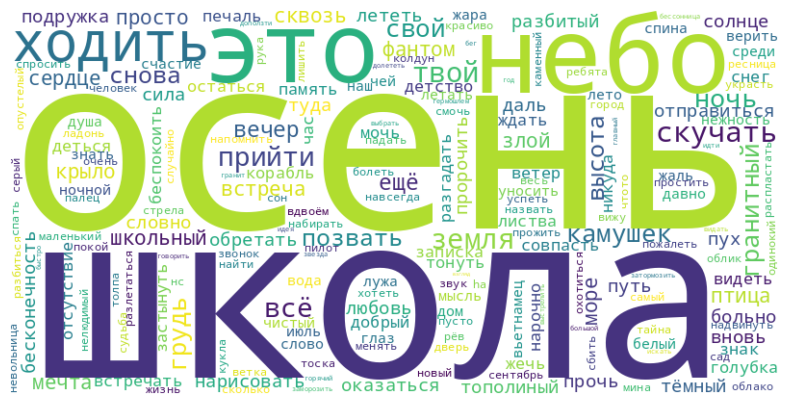

In [ ]:
# Преобразую данные в Series для WordCloud
tfidf_sum = pd.Series(tfidf_dict)

# Создаю объект WordCloud с настройками
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(tfidf_sum)

# Настройка графика
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # без осей
plt.show()

Вывод:

Тематика текста связана со школьной и осенней порой и много слов, описывающих эмоции

# <font color='#11a642' size='6'>Работа с Word2Vec

# <font color='#11a642' size='5'>Подготовка для обучения
Подготовка данных для обучения в модели Word2Vec библиотеки gensim.

In [ ]:
# Для подготовки данных для обучения в модели Word2Vec библиотеки gensim
# необходимо использовать исходный датасет с песнями, чтобы разделить его
# на предложения, так как в очищенном датасете отдельных предложений нет

# Загружаю датасет с песнями
song_data_old = "/content/songs_data.txt"
with open("songs_data.txt", encoding='utf-8') as song_file_old:
  song_data_old = song_file_old.read()
  song_data_old = song_data_old.replace('\n', ' ')

song_data_old

'ДДТ - Что такое осень  Что такое осень? Это небо. Плачущее небо под ногами. В лужах разлетаются птицы с облаками Осень я давно с тобою не был. В лужах разлетаются птицы с облаками Осень я давно с тобою не был.  Осень в небе, жгут корабли Осень мне бы, прочь от земли Там, где в море тонет печаль Осень темная даль.  Что такое осень? Это камни Верность над чернеющей Невою Осень вновь напомнила душе о самом главном Осень я опять лишен покоя. Осень вновь напомнила душе о самом главном Осень я опять лишен покоя.  Осень в небе, жгут корабли Осень мне бы, прочь от земли Там, где в море тонет печаль Осень темная даль.  Что такое осень? Это ветер Вновь играет рваными цепями Осень доползем ли, долетим ли до ответа Что же будет с родиной и с нами. Осень доползем ли, долетим ли до рассвета Что же будет завтра с нами.  Осень в небе, жгут корабли Осень мне бы, прочь от земли Там, где в море тонет печаль Осень темная даль.  Осень в небе, жгут корабли Осень мне бы, прочь от земли Там, где в море тонет

In [ ]:
# Очистка текста от пунктуации, чисел, стоп-слов и приведение к нижнему регистру

# Получаю список стоп-слов
stopWords = set(nltk.corpus.stopwords.words('russian'))

def preprocess_text(text):
    text = text.lower()  # Приводим к нижнему регистру
    text = re.sub(r'\d+', '', text)  # Удаляем числа
    text = re.sub(r'[^\w\s]', '', text)  # Удаляем пунктуацию
    words = text.split() # Разбиваем текст на слова
    words = [word for word in words if word not in stopWords] # Убираем стоп-слова
    return ' '.join(words)

# Преобразование текста
cleaned_text = preprocess_text(song_data_old)

# Токенизация на предложения и слова
sentences = sent_tokenize(cleaned_text)  # Разбиваем текст на предложения
tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]  # Токенизируем предложения на слова

# Данные готовы для обучения модели Word2Vec
print(tokenized_sentences)

[['ддт', 'такое', 'осень', 'такое', 'осень', 'это', 'небо', 'плачущее', 'небо', 'ногами', 'лужах', 'разлетаются', 'птицы', 'облаками', 'осень', 'давно', 'тобою', 'лужах', 'разлетаются', 'птицы', 'облаками', 'осень', 'давно', 'тобою', 'осень', 'небе', 'жгут', 'корабли', 'осень', 'прочь', 'земли', 'море', 'тонет', 'печаль', 'осень', 'темная', 'даль', 'такое', 'осень', 'это', 'камни', 'верность', 'чернеющей', 'невою', 'осень', 'вновь', 'напомнила', 'душе', 'самом', 'главном', 'осень', 'лишен', 'покоя', 'осень', 'вновь', 'напомнила', 'душе', 'самом', 'главном', 'осень', 'лишен', 'покоя', 'осень', 'небе', 'жгут', 'корабли', 'осень', 'прочь', 'земли', 'море', 'тонет', 'печаль', 'осень', 'темная', 'даль', 'такое', 'осень', 'это', 'ветер', 'вновь', 'играет', 'рваными', 'цепями', 'осень', 'доползем', 'долетим', 'ответа', 'родиной', 'нами', 'осень', 'доползем', 'долетим', 'рассвета', 'завтра', 'нами', 'осень', 'небе', 'жгут', 'корабли', 'осень', 'прочь', 'земли', 'море', 'тонет', 'печаль', 'осен

# <font color='#11a642' size='5'>Обучение модели Word2Vec
Обучение модели Word2Vec на данных.


In [ ]:
model = Word2Vec(sentences=tokenized_sentences, vector_size=100, epochs=30)
model

In [ ]:
# Проверка - Получение вектора для слова "осень"
vector = model.wv['осень']
vector

array([-0.00356886,  0.01772727,  0.0039993 ,  0.01370766, -0.00524734,
       -0.037006  ,  0.0134142 ,  0.05829302, -0.01236257, -0.04394088,
        0.02058508, -0.03444458,  0.00568876,  0.02911646,  0.00160459,
       -0.01480026,  0.03524009, -0.01069951,  0.0029856 , -0.06289964,
        0.02058517,  0.00568862,  0.04625143, -0.02054238,  0.00056559,
       -0.00234592, -0.03056084,  0.01753252, -0.02335799, -0.00334844,
        0.02057595, -0.02308926,  0.03417724, -0.07425817, -0.00834886,
        0.02335093,  0.02309036, -0.01202257, -0.03657918, -0.0187532 ,
       -0.01371912, -0.00961149, -0.0254726 , -0.00440578,  0.01944001,
       -0.0290162 , -0.00997326, -0.01425015,  0.01422937,  0.03030393,
        0.00424478, -0.01863568, -0.01943767,  0.00218167,  0.00971354,
       -0.00018327,  0.02470403, -0.00156748, -0.02114949,  0.00210893,
       -0.01256012, -0.02541686,  0.03673564,  0.02932414, -0.02220627,
        0.05004361, -0.02175784,  0.03108519, -0.0426244 ,  0.02

# <font color='#11a642' size='5'>Поиск близких слов
Проверка близких слов к одному из слов в датасете.


In [ ]:
# Проверить слова, близкие к слову через функцию shpw_similar
def show_similar(word, model, top_n=5):
    print(f'Слова, близкие к слову: {word}')
    similar_words = model.wv.most_similar(word, topn=top_n)
    for word in similar_words:
        print(word)
    print('\n')

In [ ]:
show_similar('осень', model)

Слова, близкие к слову: осень
('камушек', 0.9526698589324951)
('приду', 0.9519612193107605)
('груди', 0.9505985379219055)
('тобой', 0.9453260898590088)
('снова', 0.9440330266952515)




Вывод:

Слова, которые модель считает близкими к слову «осень», имеют высокие значения косинусного сходства (в пределах 0.94-0.95). Но такие слова не кажутся очевидно связанными с понятием осени. Скорее всего, это говорит о поэтическом и метафорическом языке текста.

# <font color='#11a642' size='6'>Визуализация с t-SNE

## <font color='#11a642' size='5'>Отбор слов
Выбор 15 наиболее часто встречающихся слов в тексте.

In [ ]:
def words_for_tsne(tokenized):
    '''функция, выбирающая 15 наиболее частых слов'''
    count_vectorizer = CountVectorizer(max_features=15)
    count_vec = count_vectorizer.fit_transform(tokenized)
    words = count_vectorizer.get_feature_names_out()  # Получаем имена (слова)
    return words

In [ ]:
# 15 наиболее частых слов
words = words_for_tsne(sentences)
print(words)

['вечер' 'гранитный' 'груди' 'камушек' 'небе' 'ночи' 'осень' 'приду'
 'скучаю' 'снова' 'тебе' 'тобой' 'ходи' 'школа' 'это']


In [ ]:
# Подсчет частоты слов и отбор 15 наиболее частых
# Токенизация на слова для каждого предложения
tokenized_sentences_for_tsne = [word_tokenize(sentence) for sentence in sentences]  # Токенизируем предложения на слова
flat_tokenized_words = [word for sentence in tokenized_sentences_for_tsne for word in sentence]

word_counts = Counter(flat_tokenized_words)
most_common_words = [word for word, _ in word_counts.most_common(15)]
most_common_words

['осень',
 'школа',
 'это',
 'скучаю',
 'ходи',
 'небе',
 'тобой',
 'тебе',
 'приду',
 'груди',
 'гранитный',
 'камушек',
 'снова',
 'вечер',
 'ночи']

## <font color='#11a642' size='5'>Построение графика
Построение графика t-SNE для 15 наиболее часто встречающихся слов.

In [ ]:
#Создание векторов с помощью Word2Vec только для 15 наиболее частых слов
model = Word2Vec([flat_tokenized_words], vector_size=100, window=5, min_count=1, workers=4)
model

In [ ]:
# Получение векторов для 15 наиболее частых слов, с проверкой на наличие в модели
word_vectors = []
valid_words = []
for word in most_common_words:
    if word in model.wv:
        word_vectors.append(model.wv[word])
        valid_words.append(word)

# Преобразуем список в массив NumPy
word_vectors = np.array(word_vectors)

In [ ]:
# Применение t-SNE
perplexity_value = min(len(valid_words) - 1, 5)  # Перплексия меньше количества слов
tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=0)
tsne_results = tsne.fit_transform(word_vectors)

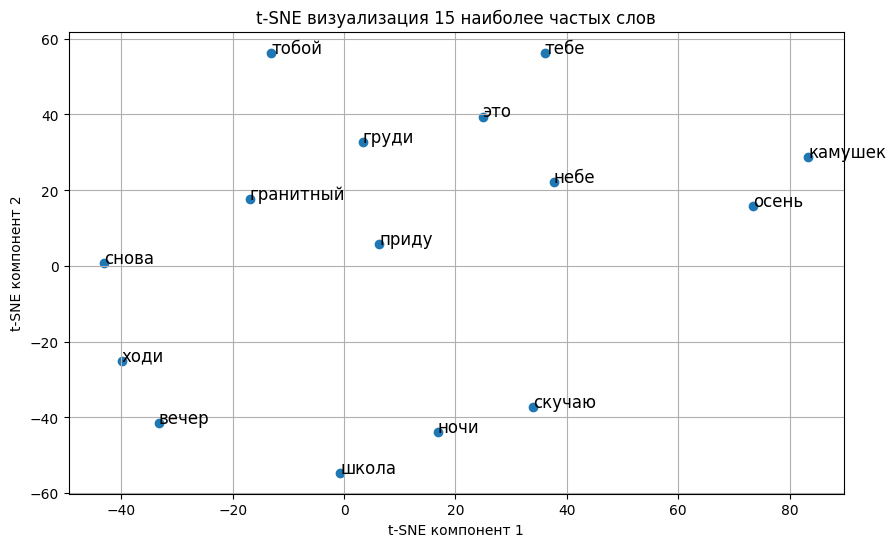

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])

# Добавляем аннотации для каждого слова
for i, word in enumerate(valid_words):
    plt.annotate(word, xy=(tsne_results[i, 0], tsne_results[i, 1]), fontsize=12)

plt.title("t-SNE визуализация 15 наиболее частых слов")
plt.xlabel("t-SNE компонент 1")
plt.ylabel("t-SNE компонент 2")
plt.grid()
plt.show()

Вывод по графику:

На графике можно увидеть как распределены семантические темы в песне. Можем наблюдать какие слова ассоциируются с конкретными темами.

Общий вывод:

В ходе выполнения работы были проведены несколько ключевых этапов анализа текстов песен.

1. Препроцессинг текста.
Были загружены и обработаны тексты песен.

2. TF-IDF анализ. Была рассчитана метрика TF-IDF для выявления наиболее значимых слов в текстах песен. Это позволило понять, какие слова имеют наибольший вес в контексте всех песен.

3. Визуализация частоты слов через WordCloud.

4. Обучение модели Word2Vec. Модель позволила создать связи между словами.

5. Поиск схожих слов. Была проверена способность модели находить близкие слова с помощью функции show_similar и это позволило анализировать скрытые связи между словами.

6. t-SNE визуализация. Был построен двумерный график слов в пространсте, чтобы посмотреть на взаимосвязи между наиболее частыми словами.

В работе были продемонстрированы различные методы обработки текста для анализа текстов песен.